EDA

# Analisis EDA

In [1]:
# Importando las librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import warnings 
warnings.filterwarnings('ignore')

from typing import List, Dict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.exceptions import NotFittedError

# Tranformers
from transformers.columnSelectorTransformer import ColumnSelectorTransformer
from transformers.woeTransformer import WOETransformer
from transformers.binningTransformer import BinningTransformer


c:\Users\jpgz3\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Carga de los datos
data = pd.read_csv("credit_risk_data_v1.csv",low_memory=False)

In [3]:
# Informacion basica del csv
#data = data.reset_index()
data.drop(['id'],axis=1, inplace=True)
data

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,status
0,5000,36 months,10.65,B,10 yrs,RENT,24000.0,Verified,credit_card,27.65,...,1.0,3.0,0.0,83.7,9.0,f,0.00,5861.071414,861.07,0
1,2500,60 months,15.27,C,<= 1 yr,RENT,30000.0,Source Verified,car,1.00,...,5.0,3.0,0.0,9.4,4.0,f,0.00,1008.710000,435.17,1
2,2400,36 months,15.96,C,10 yrs,RENT,12252.0,Not Verified,small_business,8.72,...,2.0,2.0,0.0,98.5,10.0,f,0.00,3003.653644,603.65,0
3,10000,36 months,13.49,C,10 yrs,RENT,49200.0,Source Verified,other,20.00,...,1.0,10.0,0.0,21.0,37.0,f,0.00,12226.302210,2209.33,0
4,3000,60 months,12.69,B,<= 1 yr,RENT,80000.0,Source Verified,other,17.94,...,0.0,15.0,0.0,53.9,38.0,f,766.90,3242.170000,1009.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465940,18400,60 months,14.47,C,4 yrs,MORTGAGE,110000.0,Source Verified,debt_consolidation,19.85,...,2.0,18.0,0.0,77.6,36.0,w,12574.00,10383.360000,4557.36,0
465941,22000,60 months,19.97,D,10 yrs,MORTGAGE,78000.0,Verified,debt_consolidation,18.45,...,5.0,18.0,1.0,46.3,30.0,f,0.00,4677.920000,2840.88,1
465942,20700,60 months,16.99,D,7 yrs,MORTGAGE,46000.0,Verified,debt_consolidation,25.65,...,2.0,18.0,0.0,51.1,43.0,f,14428.31,12343.980000,6072.29,0
465943,2000,36 months,7.90,A,3 yrs,OWN,83000.0,Verified,credit_card,5.39,...,1.0,21.0,0.0,21.5,27.0,w,0.00,2126.579838,126.58,0


In [5]:
# Correlacion de los datos 
data.corr()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,status
loan_amnt,1.000000,0.167294,0.370822,0.057120,0.006876,-0.020371,0.204111,-0.081253,0.117756,0.235198,0.518604,0.743793,0.715852,0.011969
int_rate,0.167294,1.000000,-0.046143,0.159890,0.079141,0.205716,0.012746,0.066762,0.323365,-0.032881,0.137552,0.127112,0.485321,0.172287
annual_inc,0.370822,-0.046143,1.000000,-0.188554,0.058888,0.056757,0.158170,-0.015410,0.037582,0.224839,0.168284,0.299693,0.212916,-0.049830
dti,0.057120,0.159890,-0.188554,1.000000,-0.003694,-0.012577,0.303708,-0.046329,0.200412,0.228051,0.119959,-0.026238,0.089484,0.048231
delinq_2yrs,0.006876,0.079141,0.058888,-0.003694,1.000000,0.018074,0.059371,-0.010794,-0.013183,0.130831,0.043803,-0.019602,0.024298,0.001280
inq_last_6mths,-0.020371,0.205716,0.056757,-0.012577,0.018074,1.000000,0.092776,0.038300,-0.094701,0.124167,-0.070388,0.020601,0.044075,0.073093
open_acc,0.204111,0.012746,0.158170,0.303708,0.059371,0.092776,1.000000,-0.030723,-0.124269,0.682259,0.144534,0.120069,0.121742,-0.005932
pub_rec,-0.081253,0.066762,-0.015410,-0.046329,-0.010794,0.038300,-0.030723,1.000000,-0.062490,0.007144,0.002304,-0.091260,-0.049338,-0.009089
revol_util,0.117756,0.323365,0.037582,0.200412,-0.013183,-0.094701,-0.124269,-0.062490,1.000000,-0.094306,0.096723,0.085961,0.209685,0.050207
total_acc,0.235198,-0.032881,0.224839,0.228051,0.130831,0.124167,0.682259,0.007144,-0.094306,1.000000,0.123349,0.168595,0.126775,-0.022893


Se utilizaran todas las columnas para nuestro modelo 

In [6]:
data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,status
count,465945.000000,465945.000000,4.659450e+05,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000
mean,14319.729099,13.828301,7.326927e+04,17.222069,0.284555,0.804822,11.191688,0.160639,56.176947,25.068598,4411.075743,11542.675549,2589.145448,0.109262
std,8285.101965,4.357446,5.494322e+04,7.849979,0.797168,1.091554,4.985438,0.510991,23.732628,11.599031,6355.050117,8265.244601,2483.828760,0.311968
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.990000,4.500000e+04,11.370000,0.000000,0.000000,8.000000,0.000000,39.200000,17.000000,0.000000,5554.408448,957.740000,0.000000
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,57.600000,23.000000,449.160000,9421.340000,1819.120000,0.000000
75%,20000.000000,16.490000,8.886300e+04,22.780000,0.000000,1.000000,14.000000,0.000000,74.700000,32.000000,7344.630000,15309.980000,3305.060000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,892.300000,156.000000,32160.380000,57777.579870,24205.620000,1.000000


## Visualizations  EDA


## WOE

In [7]:
from bins import bins

In [8]:
cols_to_keep = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'status']

In [9]:
column_t = ColumnSelectorTransformer(columns=cols_to_keep)
binning_t = BinningTransformer(bins=bins)
woe_t = WOETransformer(columns=cols_to_keep)

In [10]:
dataset_c = column_t.transform(data)
dataset_c.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,status
0,5000,36 months,10.65,B,10 yrs,RENT,24000.0,Verified,credit_card,27.65,...,1.0,3.0,0.0,83.7,9.0,f,0.0,5861.071414,861.07,0
1,2500,60 months,15.27,C,<= 1 yr,RENT,30000.0,Source Verified,car,1.00,...,5.0,3.0,0.0,9.4,4.0,f,0.0,1008.710000,435.17,1
2,2400,36 months,15.96,C,10 yrs,RENT,12252.0,Not Verified,small_business,8.72,...,2.0,2.0,0.0,98.5,10.0,f,0.0,3003.653644,603.65,0
3,10000,36 months,13.49,C,10 yrs,RENT,49200.0,Source Verified,other,20.00,...,1.0,10.0,0.0,21.0,37.0,f,0.0,12226.302210,2209.33,0
4,3000,60 months,12.69,B,<= 1 yr,RENT,80000.0,Source Verified,other,17.94,...,0.0,15.0,0.0,53.9,38.0,f,766.9,3242.170000,1009.07,0


In [11]:
dataset_c = column_t.undersampling(X=dataset_c, y='status')
dataset_c.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,status
0,20000,60 months,20.20,E,2 yrs,RENT,80000.0,Source Verified,debt_consolidation,19.35,...,0.0,21.0,0.0,50.9,36.0,f,15666.53,10110.090000,5776.62,0
1,9750,36 months,18.75,D,<= 1 yr,OWN,28000.0,Not Verified,debt_consolidation,26.14,...,0.0,7.0,0.0,67.8,9.0,f,0.00,12351.700510,2601.70,0
2,12000,36 months,15.80,C,10 yrs,OWN,60000.0,Verified,debt_consolidation,33.24,...,2.0,14.0,0.0,40.9,33.0,f,1231.54,13890.630000,3122.17,0
3,7000,36 months,12.85,B,<= 1 yr,MORTGAGE,50000.0,Verified,credit_card,14.07,...,1.0,9.0,1.0,69.0,28.0,f,0.00,8186.510003,1186.51,0
4,12000,60 months,16.20,C,3 yrs,MORTGAGE,51451.0,Source Verified,credit_card,21.41,...,2.0,7.0,0.0,54.8,15.0,f,8132.30,7327.440000,3459.74,0


In [14]:
x_train_c = data.drop("status", axis=1)
y_train = data['status']
x_train_c.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int
0,5000,36 months,10.65,B,10 yrs,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,83.7,9.0,f,0.0,5861.071414,861.07
1,2500,60 months,15.27,C,<= 1 yr,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,9.4,4.0,f,0.0,1008.710000,435.17
2,2400,36 months,15.96,C,10 yrs,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,98.5,10.0,f,0.0,3003.653644,603.65
3,10000,36 months,13.49,C,10 yrs,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,21.0,37.0,f,0.0,12226.302210,2209.33
4,3000,60 months,12.69,B,<= 1 yr,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,53.9,38.0,f,766.9,3242.170000,1009.07


In [15]:
x_train_b = binning_t.transform(x_train_c)
x_train_b.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int
0,"(1000, 10000)",36 months,"(9, 15)",B,10 yrs,RENT,"(3.000e+03, 6.0000e+04)",Verified,credit_card,"(20, 30)","(-inf, 10)","(-inf, 10)","(-inf, 20)","(-inf, 30)","(50, 100)","(-inf, 20)",f,"(-inf, 1000)","(1000, 15_000)","(-inf, 1000)"
1,"(1000, 10000)",60 months,"(15, 20)",C,<= 1 yr,RENT,"(3.000e+03, 6.0000e+04)",Source Verified,car,"(-inf, 10)","(-inf, 10)","(-inf, 10)","(-inf, 20)","(-inf, 30)","(-inf, 50)","(-inf, 20)",f,"(-inf, 1000)","(1000, 15_000)","(-inf, 1000)"
2,"(1000, 10000)",36 months,"(15, 20)",C,10 yrs,RENT,"(3.000e+03, 6.0000e+04)",Not Verified,small_business,"(-inf, 10)","(-inf, 10)","(-inf, 10)","(-inf, 20)","(-inf, 30)","(50, 100)","(-inf, 20)",f,"(-inf, 1000)","(1000, 15_000)","(-inf, 1000)"
3,"(1000, 10000)",36 months,"(9, 15)",C,10 yrs,RENT,"(3.000e+03, 6.0000e+04)",Source Verified,other,"(10, 20)","(-inf, 10)","(-inf, 10)","(-inf, 20)","(-inf, 30)","(-inf, 50)","(20, 50)",f,"(-inf, 1000)","(15_000, 35_000)","(1000, 10_000)"
4,"(1000, 10000)",60 months,"(9, 15)",B,<= 1 yr,RENT,"(1.00000e+04, 1.0000e+05)",Source Verified,other,"(10, 20)","(-inf, 10)","(-inf, 10)","(-inf, 20)","(-inf, 30)","(50, 100)","(20, 50)",f,"(-inf, 1000)","(1000, 15_000)","(1000, 10_000)"


In [16]:
woe_t.fit(x_train_b, y_train)

WOETransformer(columns=['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int', 'status'], target_mappings={0: 'good', 1: 'bad'})

In [17]:
woe_t.transform(x_train_b).head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int
0,0.039104,0.132276,0.245609,0.363488,0.103018,-0.161971,-0.192434,-0.173580,0.262242,-0.167252,0.000165,0.000447,-0.002391,-0.000012,-0.101005,-0.083556,-0.10827,-0.582127,-0.387536,-0.195181
1,0.039104,-0.294989,-0.392335,-0.055709,-0.103593,-0.161971,-0.192434,0.054494,0.226328,0.228539,0.000165,0.000447,-0.002391,-0.000012,0.177735,-0.083556,-0.10827,-0.582127,-0.387536,-0.195181
2,0.039104,0.132276,-0.392335,-0.055709,0.103018,-0.161971,-0.192434,0.167166,-0.807898,0.228539,0.000165,0.000447,-0.002391,-0.000012,-0.101005,-0.083556,-0.10827,-0.582127,-0.387536,-0.195181
3,0.039104,0.132276,0.245609,-0.055709,0.103018,-0.161971,-0.192434,0.054494,-0.264567,0.061188,0.000165,0.000447,-0.002391,-0.000012,0.177735,0.054099,-0.10827,-0.582127,0.756906,0.074181
4,0.039104,-0.294989,0.245609,0.363488,-0.103593,-0.161971,0.129966,0.054494,-0.264567,0.061188,0.000165,0.000447,-0.002391,-0.000012,-0.101005,0.054099,-0.10827,-0.582127,-0.387536,0.074181


## WOE

In [21]:
display(woe_t.woe_mappings['loan_amnt'])
display(woe_t.woe_mappings['int_rate'])

,loan_amnt,good,bad,woe,info_val
3,"(20_000, inf)",0.208178,0.221960,-0.064107,0.000884
2,"(10_000, 20_000 )",0.391321,0.393105,-0.004549,0.000008
1,"(1000, 10000)",0.397364,0.382125,0.039104,0.000596
0,"(-inf, 1000)",0.003137,0.002809,0.110509,0.000036


,int_rate,good,bad,woe,info_val
2,"(20, inf)",0.075529,0.172245,-0.824408,0.079734
1,"(15, 20)",0.264751,0.391947,-0.392335,0.049903
3,"(9, 15)",0.484441,0.378943,0.245609,0.025911
0,"(-inf, 9)",0.175279,0.056865,1.125699,0.133299


In [22]:
display(woe_t.woe_mappings['grade'])
display(woe_t.woe_mappings['emp_length'])

,grade,good,bad,woe,info_val
6,G,0.005766,0.018051,-1.141287,0.014021
5,F,0.024157,0.062581,-0.951888,0.036575
4,E,0.069300,0.136535,-0.678134,0.045594
3,D,0.156546,0.232351,-0.394901,0.029936
2,C,0.267043,0.282341,-0.055709,0.000852
1,B,0.303856,0.211255,0.363488,0.033659
0,A,0.173332,0.056885,1.114185,0.129744


,emp_length,good,bad,woe,info_val
9,<= 1 yr,0.184090,0.204184,-0.103593,2.081538e-03
5,6 yrs,0.055511,0.060008,-0.077895,3.502826e-04
4,5 yrs,0.065590,0.069417,-0.056708,2.170212e-04
8,9 yrs,0.038247,0.039344,-0.028267,3.099655e-05
6,7 yrs,0.056012,0.057238,-0.021654,2.655053e-05
7,8 yrs,0.047998,0.048340,-0.007097,2.426019e-06
1,2 yrs,0.088696,0.089138,-0.004966,2.192784e-06
3,4 yrs,0.060079,0.060224,-0.002405,3.478683e-07
2,3 yrs,0.078473,0.078649,-0.002236,3.929314e-07
0,10 yrs,0.325303,0.293459,0.103018,3.280468e-03


In [23]:
display(woe_t.woe_mappings['home_ownership'])
display(woe_t.woe_mappings['annual_inc'])

,home_ownership,good,bad,woe,info_val
3,OTHER,0.000342,0.000746,-0.780063,0.000315
2,NONE,0.000092,0.000157,-0.540159,0.000035
5,RENT,0.396583,0.466313,-0.161971,0.011294
4,OWN,0.089537,0.088509,0.011546,0.000012
1,MORTGAGE,0.513443,0.444274,0.144698,0.010009
0,ANY,0.000002,NaN,NaN,NaN


,annual_inc,good,bad,woe,info_val
0,"(-inf, 3.000e+03)",0.000005,0.000020,-1.405156,0.000021
3,"(3.000e+03, 6.0000e+04)",0.469999,0.569731,-0.192434,0.019192
1,"(1.00000e+04, 1.0000e+05)",0.357384,0.313828,0.129966,0.005661
2,"(1.0000e+05, inf)",0.172612,0.116421,0.393832,0.022130


In [24]:
display(woe_t.woe_mappings['verification_status'])
display(woe_t.woe_mappings['purpose'])

,verification_status,good,bad,woe,info_val
2,Verified,0.353103,0.420035,-0.173580,0.011618
1,Source Verified,0.323585,0.306423,0.054494,0.000935
0,Not Verified,0.323312,0.273542,0.167166,0.008320


,purpose,good,bad,woe,info_val
11,small_business,0.013240,0.029699,-0.807898,0.013298
3,educational,0.000798,0.001729,-0.773522,0.000720
10,renewable_energy,0.000716,0.001061,-0.393555,0.000136
8,moving,0.006103,0.008957,-0.383637,0.001095
5,house,0.004701,0.006227,-0.281108,0.000429
9,other,0.049059,0.063917,-0.264567,0.003931
7,medical,0.009587,0.012041,-0.227883,0.000559
13,wedding,0.004954,0.005598,-0.122275,0.000079
12,vacation,0.005274,0.005736,-0.083857,0.000039
2,debt_consolidation,0.585536,0.609802,-0.040606,0.000985


In [25]:
display(woe_t.woe_mappings['dti'])
display(woe_t.woe_mappings['delinq_2yrs'])

,dti,good,bad,woe,info_val
3,"(30, inf)",0.058537,0.072618,-0.215555,0.003035
2,"(20, 30)",0.293578,0.347024,-0.167252,0.008939
1,"(10, 20)",0.447312,0.420762,0.061188,0.001625
0,"(-inf, 10)",0.200573,0.159595,0.228539,0.009365


,delinq_2yrs,good,bad,woe,info_val
2,"(20, inf)",0.000012,0.000020,-0.488866,3.713095e-06
1,"(10, 20)",0.000275,0.000432,-0.453147,7.135238e-05
0,"(-inf, 10)",0.999713,0.999548,0.000165,2.725316e-08


In [26]:
display(woe_t.woe_mappings['inq_last_6mths'])
display(woe_t.woe_mappings['open_acc'])

,inq_last_6mths,good,bad,woe,info_val
1,"(10, 20)",0.000092,0.000491,-1.679593,6.710044e-04
2,"(20, inf)",0.000012,0.000059,-1.587478,7.442151e-05
0,"(-inf, 10)",0.999896,0.999450,0.000447,1.993242e-07


,open_acc,good,bad,woe,info_val
3,"(60, inf)",0.000010,0.000039,-1.405156,0.000042
0,"(-inf, 20)",0.950445,0.952720,-0.002391,0.000005
1,"(20, 40)",0.049172,0.047024,0.044658,0.000096
2,"(40, 60)",0.000373,0.000216,0.547226,0.000086


In [27]:
display(woe_t.woe_mappings['pub_rec'])
display(woe_t.woe_mappings['revol_util'])

,pub_rec,good,bad,woe,info_val
0,"(-inf, 30)",0.999988,1.0,-0.000012,1.451353e-10
1,"(30, 60)",0.000010,NaN,NaN,NaN
2,"(60, inf)",0.000002,NaN,NaN,NaN


,revol_util,good,bad,woe,info_val
1,"(100, 250)",0.002667,0.003595,-0.298381,0.000277
3,"(50, 100)",0.600027,0.663799,-0.101005,0.006441
0,"(-inf, 50)",0.397301,0.332607,0.177735,0.011499
2,"(258, inf)",0.000005,NaN,NaN,NaN


In [28]:
display(woe_t.woe_mappings['total_acc'])
display(woe_t.woe_mappings['initial_list_status'])

,total_acc,good,bad,woe,info_val
0,"(-inf, 20)",0.387666,0.421450,-0.083556,0.002823
2,"(20, 50)",0.581103,0.550501,0.054099,0.001656
3,"(50, 100)",0.031193,0.028049,0.106209,0.000334
1,"(100, inf)",0.000039,NaN,NaN,NaN


,initial_list_status,good,bad,woe,info_val
0,f,0.64176,0.715144,-0.10827,0.007945
1,w,0.35824,0.284856,0.22922,0.016821


In [29]:
display(woe_t.woe_mappings['out_prncp'])
display(woe_t.woe_mappings['total_pymnt'])

,out_prncp,good,bad,woe,info_val
3,"(30_000, inf)",0.000330,0.001120,-1.221374,0.000964
0,"(-inf, 1000)",0.475929,0.851837,-0.582127,0.218826
2,"(10_000, 30_000)",0.191203,0.064211,1.091156,0.138568
1,"(1000, 10_000)",0.332538,0.082832,1.389935,0.347075


,total_pymnt,good,bad,woe,info_val
0,"(-inf, 1000)",0.003530,0.051404,-2.678477,0.128231
1,"(1000, 15_000)",0.494614,0.728737,-0.387536,0.090731
2,"(15_000, 35_000)",0.457067,0.214418,0.756906,0.183663
3,"(35_000, inf)",0.044789,0.005441,2.108004,0.082946


In [30]:
display(woe_t.woe_mappings['total_rec_int'])
display(woe_t.woe_mappings['status'])

,total_rec_int,good,bad,woe,info_val
0,"(-inf, 1000)",0.258053,0.313671,-0.195181,0.010856
1,"(1000, 10_000)",0.720477,0.668965,0.074181,0.003821
2,"(10_000, 20_000)",0.021470,0.017364,0.212281,0.000872


,status,good,bad,woe,info_val
0,0.0,1.0,NaN,NaN,NaN


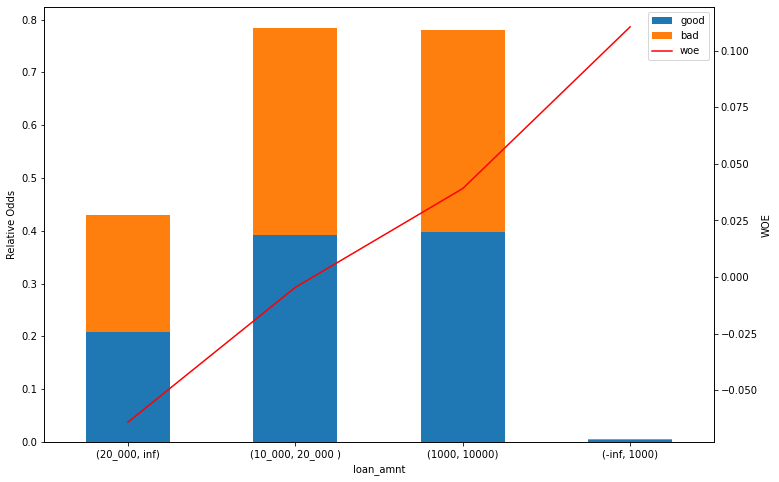

In [31]:
ax = woe_t.woe_mappings["loan_amnt"].plot.bar(
    x="loan_amnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["loan_amnt"].plot(
    x="loan_amnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

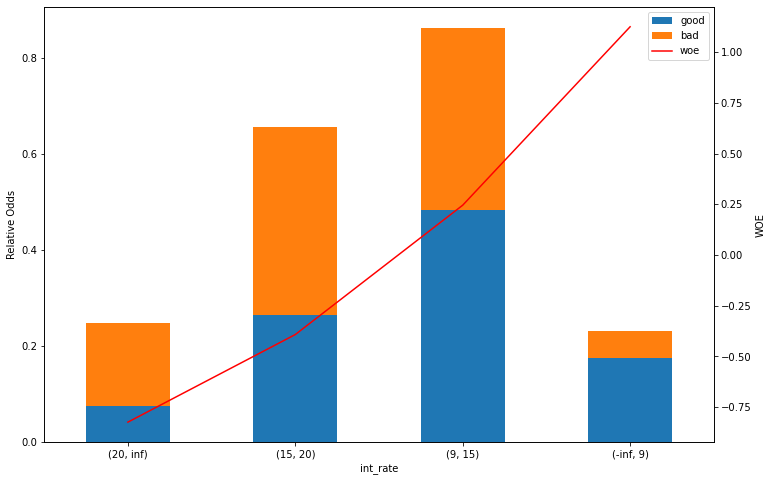

In [32]:
ax = woe_t.woe_mappings["int_rate"].plot.bar(
    x="int_rate", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["int_rate"].plot(
    x="int_rate", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

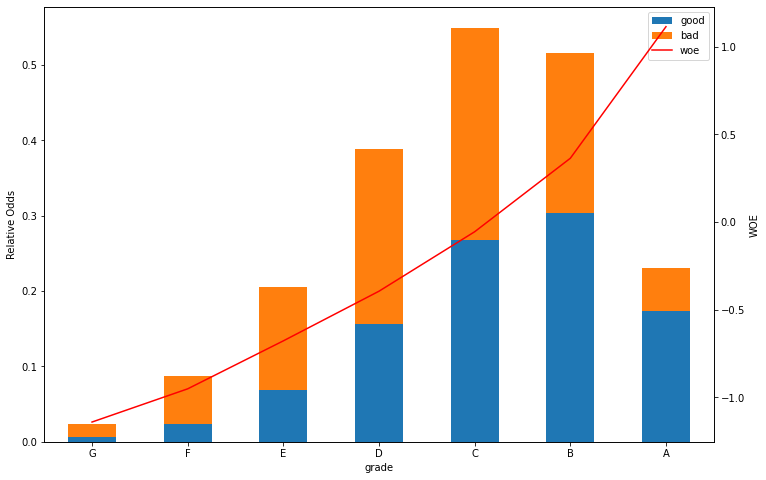

In [33]:
ax = woe_t.woe_mappings["grade"].plot.bar(
    x="grade", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["grade"].plot(
    x="grade", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

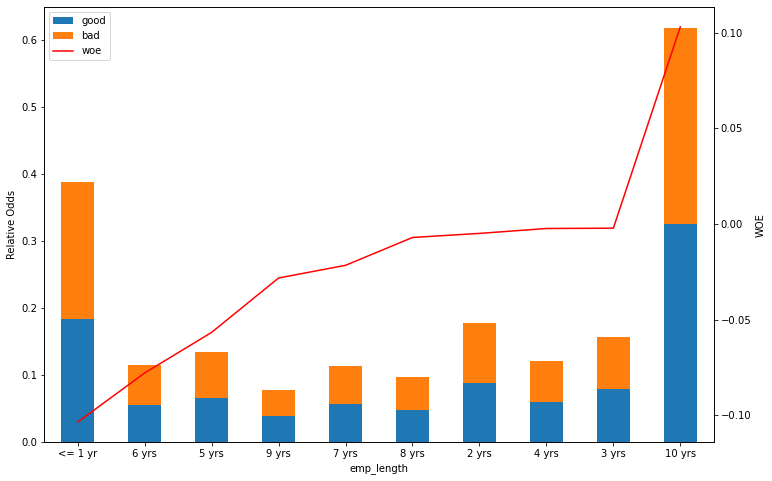

In [34]:
ax = woe_t.woe_mappings["emp_length"].plot.bar(
    x="emp_length", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["emp_length"].plot(
    x="emp_length", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

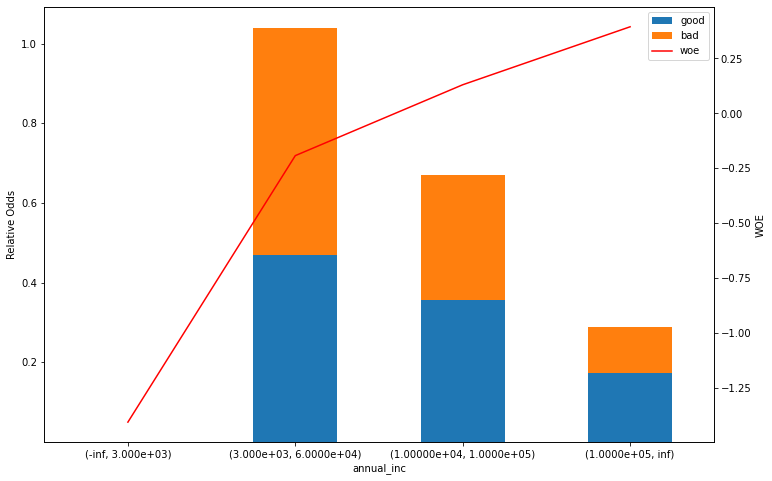

In [35]:
ax = woe_t.woe_mappings["annual_inc"].plot.bar(
    x="annual_inc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["annual_inc"].plot(
    x="annual_inc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

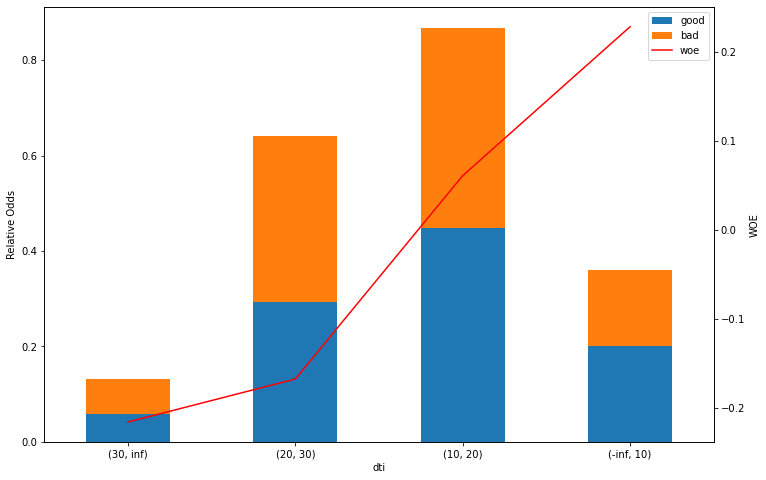

In [36]:
ax = woe_t.woe_mappings["dti"].plot.bar(
    x="dti", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["dti"].plot(
    x="dti", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

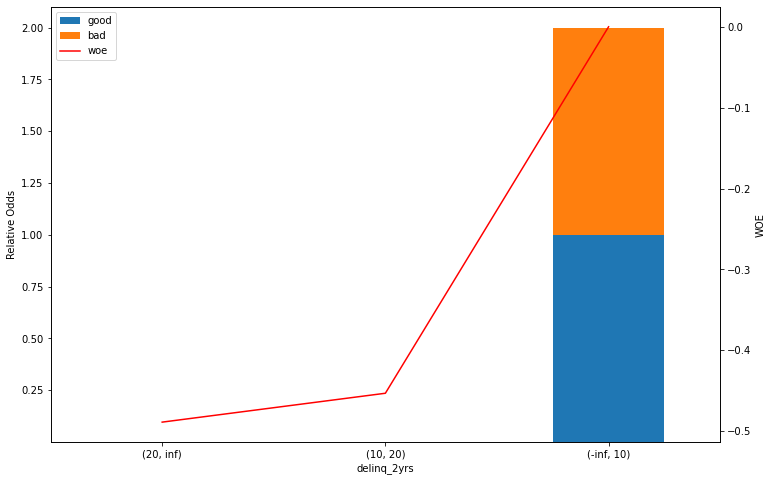

In [37]:
ax = woe_t.woe_mappings["delinq_2yrs"].plot.bar(
    x="delinq_2yrs", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["delinq_2yrs"].plot(
    x="delinq_2yrs", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

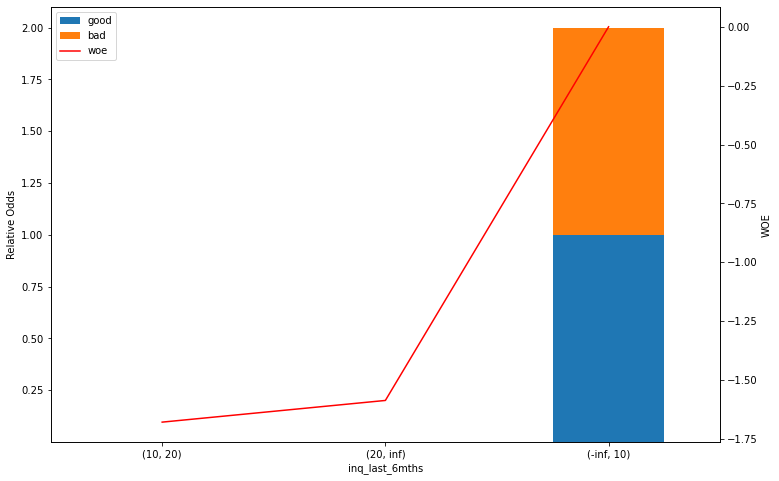

In [38]:
ax = woe_t.woe_mappings["inq_last_6mths"].plot.bar(
    x="inq_last_6mths", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["inq_last_6mths"].plot(
    x="inq_last_6mths", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

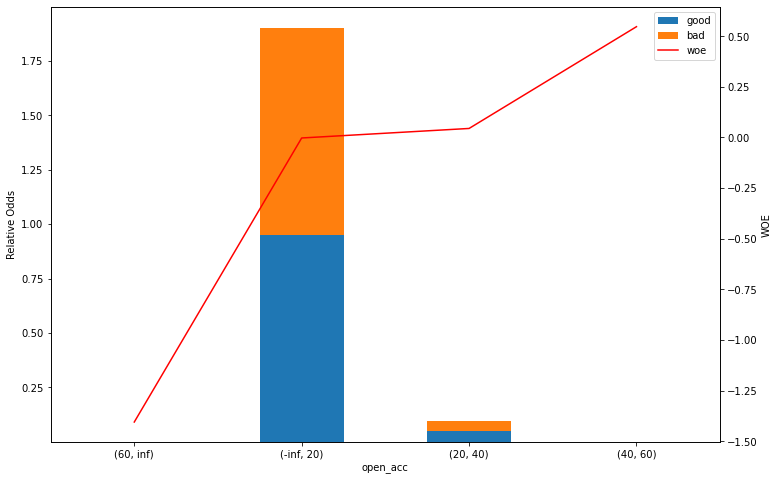

In [39]:
ax = woe_t.woe_mappings["open_acc"].plot.bar(
    x="open_acc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["open_acc"].plot(
    x="open_acc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

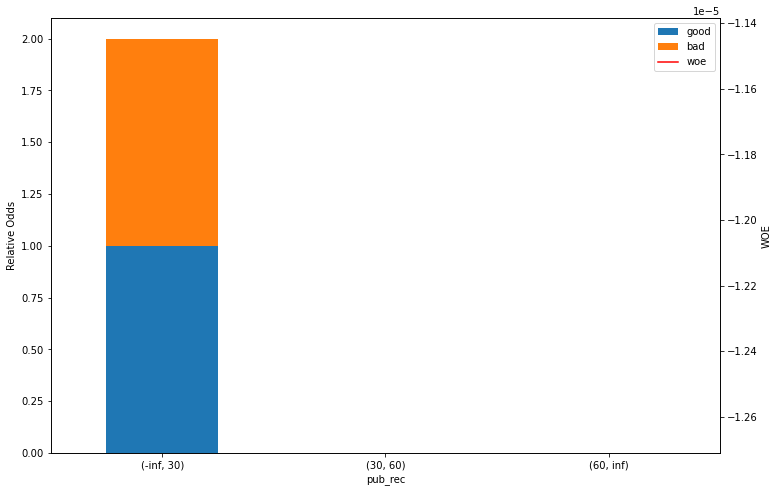

In [40]:
ax = woe_t.woe_mappings["pub_rec"].plot.bar(
    x="pub_rec", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["pub_rec"].plot(
    x="pub_rec", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");
# No sirve

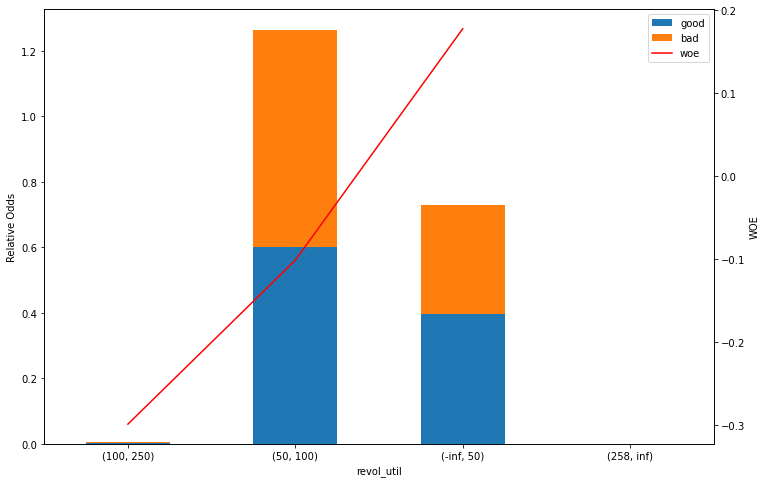

In [41]:
ax = woe_t.woe_mappings["revol_util"].plot.bar(
    x="revol_util", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["revol_util"].plot(
    x="revol_util", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

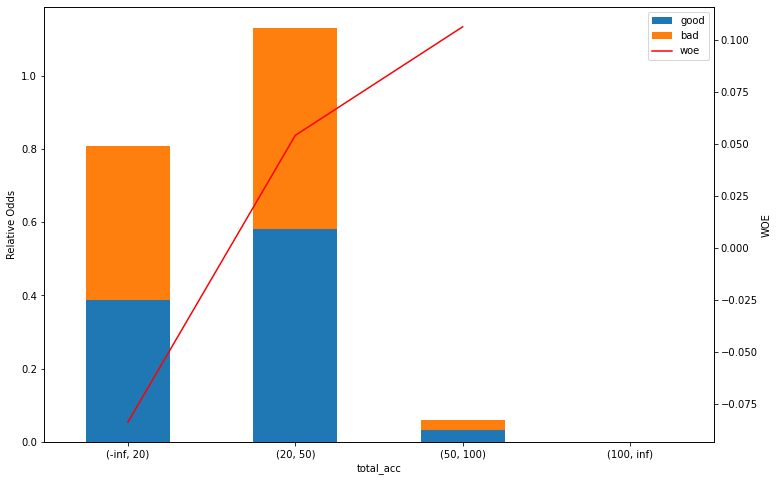

In [42]:
ax = woe_t.woe_mappings["total_acc"].plot.bar(
    x="total_acc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_acc"].plot(
    x="total_acc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

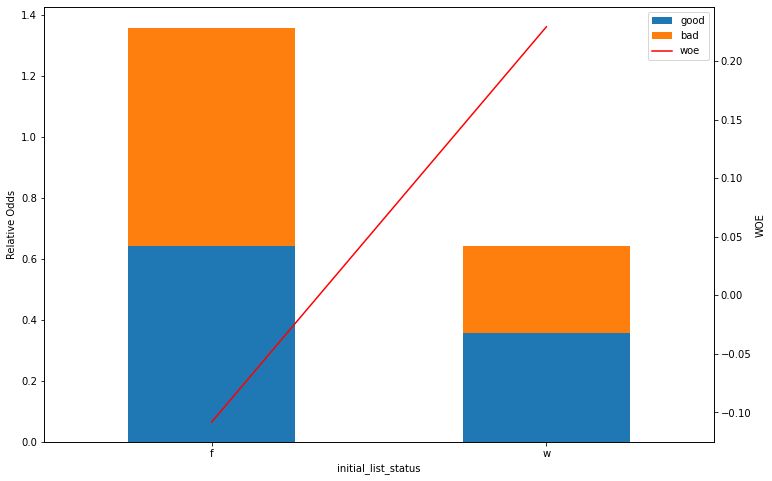

In [43]:
ax = woe_t.woe_mappings["initial_list_status"].plot.bar(
    x="initial_list_status", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["initial_list_status"].plot(
    x="initial_list_status", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

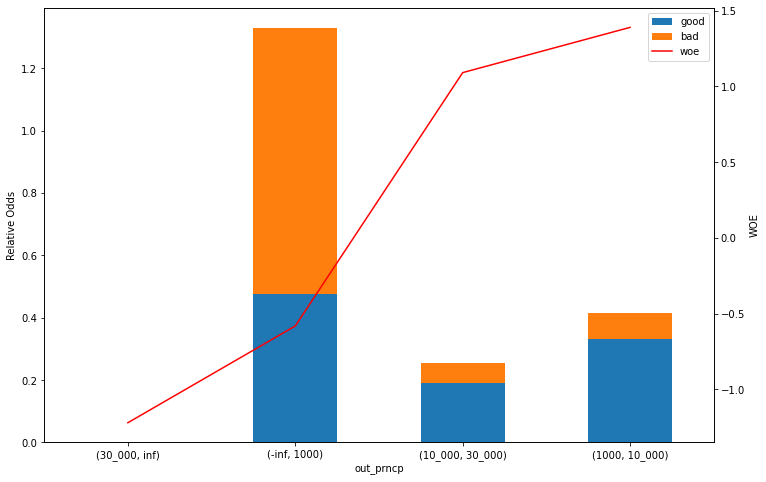

In [44]:
ax = woe_t.woe_mappings["out_prncp"].plot.bar(
    x="out_prncp", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["out_prncp"].plot(
    x="out_prncp", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

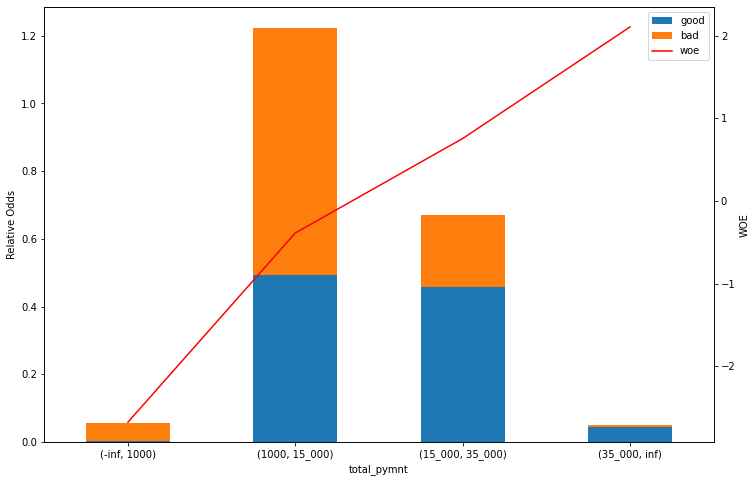

In [45]:
ax = woe_t.woe_mappings["total_pymnt"].plot.bar(
    x="total_pymnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_pymnt"].plot(
    x="total_pymnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

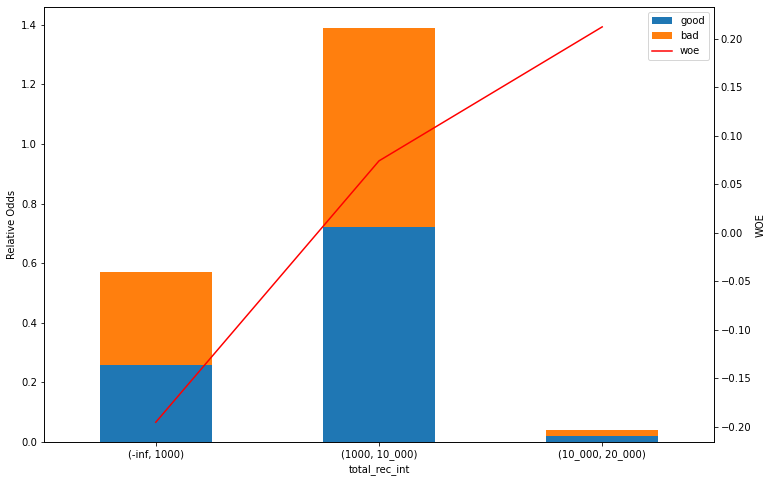

In [46]:
ax = woe_t.woe_mappings["total_rec_int"].plot.bar(
    x="total_rec_int", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_rec_int"].plot(
    x="total_rec_int", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

## Pipelines

In [17]:
for i in cols_to_keep:
       print(i,":",woe_t.woe_mappings[i]["info_val"].sum())

loan_amnt : 0.0015238548895052046
term : 0.0388936868050649
int_rate : 0.28884705522202625
grade : 0.29038265423533693
emp_length : 0.005992216634496431
home_ownership : 0.021665476346556134
annual_inc : 0.04700314579685071
verification_status : 0.020873361093898757
purpose : 0.03691862165777514
dti : 0.02296389281541246
delinq_2yrs : 7.509273055445297e-05
inq_last_6mths : 0.0007456252076791674
open_acc : 0.00022913741959972793
pub_rec : 1.4513534174038643e-10
revol_util : 0.018216589614104516
total_acc : 0.004812165109308639
initial_list_status : 0.024766325013152096
out_prncp : 0.705433211931269
total_pymnt : 0.4855710319693385
total_rec_int : 0.015548546094269854
status : 0.0


In [19]:
new_cols_to_keep = ['int_rate','grade','annual_inc','purpose','pub_rec','out_prncp','total_pymnt']
x_train_b = x_train_b.loc[:, new_cols_to_keep]

In [37]:
x_train_b

,int_rate,grade,annual_inc,purpose,pub_rec,out_prncp,total_pymnt
0,"(9, 15)",B,"(3.000e+03, 6.0000e+04)",credit_card,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"
1,"(15, 20)",C,"(3.000e+03, 6.0000e+04)",car,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"
2,"(15, 20)",C,"(3.000e+03, 6.0000e+04)",small_business,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"
3,"(9, 15)",C,"(3.000e+03, 6.0000e+04)",other,"(-inf, 30)","(-inf, 1000)","(15_000, 35_000)"
4,"(9, 15)",B,"(1.00000e+04, 1.0000e+05)",other,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"
...,...,...,...,...,...,...,...
465940,"(9, 15)",C,"(1.0000e+05, inf)",debt_consolidation,"(-inf, 30)","(10_000, 30_000)","(15_000, 35_000)"
465941,"(15, 20)",D,"(1.00000e+04, 1.0000e+05)",debt_consolidation,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"
465942,"(15, 20)",D,"(3.000e+03, 6.0000e+04)",debt_consolidation,"(-inf, 30)","(10_000, 30_000)","(15_000, 35_000)"
465943,"(-inf, 9)",A,"(1.00000e+04, 1.0000e+05)",credit_card,"(-inf, 30)","(-inf, 1000)","(1000, 15_000)"


In [20]:
seed = 4206
new_bins = {k: v for k, v in bins.items() if k in new_cols_to_keep}
y_train_nd = [1 if val==0 else 0 for val in y_train.values]

In [39]:
new_bins

{'int_rate': [{'label': '(-inf, 9)', 'max': 9},
  {'label': '(9, 15)', 'max': 15},
  {'label': '(15, 20)', 'max': 20},
  {'label': '(20, inf)', 'max': 9223372036854775807}],
 'annual_inc': [{'label': '(-inf, 3.000e+03)', 'max': 3000.0},
  {'label': '(3.000e+03, 6.0000e+04)', 'max': 60000.0},
  {'label': '(6.0000e+04, 1.00000e+04)', 'max': 10000.0},
  {'label': '(1.00000e+04, 1.0000e+05)', 'max': 100000.0},
  {'label': '(1.0000e+05, inf)', 'max': 9223372036854775807}],
 'pub_rec': [{'label': '(-inf, 30)', 'max': 30},
  {'label': '(30, 60)', 'max': 60},
  {'label': '(60, inf)', 'max': 9223372036854775807}],
 'out_prncp': [{'label': '(-inf, 1000)', 'max': 1000},
  {'label': '(1000, 10_000)', 'max': 10000},
  {'label': '(10_000, 30_000)', 'max': 30000},
  {'label': '(30_000, inf)', 'max': 9223372036854775807}],
 'total_pymnt': [{'label': '(-inf, 1000)', 'max': 1000},
  {'label': '(1000, 15_000)', 'max': 10000},
  {'label': '(15_000, 35_000)', 'max': 30000},
  {'label': '(35_000, inf)', 'ma

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

ml_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=new_cols_to_keep)),
    ('bins', BinningTransformer(bins=new_bins)),
    ('woe', WOETransformer(columns=new_cols_to_keep)), 
    ('logistic regression', LogisticRegressionCV(random_state=seed)),
    #('scaler', StandardScaler()), 
    #('gdbt', GradientBoostingClassifier(random_state=seed)),                                     
])

## Target Variable

We change the model to predict the non-default probability.


In [23]:
ml_pipe

Pipeline(steps=[('col selector',
                 ColumnSelectorTransformer(['int_rate', 'grade', 'annual_inc', 'purpose', 'pub_rec', 'out_prncp', 'total_pymnt'])),
                ('bins', BinningTransformer()),
                ('woe',
                 WOETransformer(columns=['int_rate', 'grade', 'annual_inc', 'purpose', 'pub_rec', 'out_prncp', 'total_pymnt'], target_mappings={0: 'good', 1: 'bad'})),
                ('logistic regression',
                 LogisticRegressionCV(random_state=4206))])

In [28]:
_test = ml_pipe[:-2].transform(x_train_c)

In [40]:
_test[_test.loc[:, "pub_rec"] == ('(30, 60)')].index.values

array([ 71614, 132631, 418553, 457544], dtype=int64)

In [59]:
for v in set(x_train_c.loc[:, "pub_rec"].values):
    print(f"Val {v} - CT {(x_train_c.loc[:, 'pub_rec'] == v).sum()}") 

Val 0.0 - CT 404596
Val 1.0 - CT 53038
Val 2.0 - CT 5623
Val 3.0 - CT 1611
Val 4.0 - CT 520
Val 5.0 - CT 276
Val 6.0 - CT 136
Val 7.0 - CT 62
Val 8.0 - CT 29
Val 9.0 - CT 16
Val 10.0 - CT 13
Val 11.0 - CT 8
Val 12.0 - CT 2
Val 13.0 - CT 2
Val 14.0 - CT 1
Val 15.0 - CT 1
Val 16.0 - CT 1
Val 17.0 - CT 1
Val 18.0 - CT 2
Val 19.0 - CT 1
Val 21.0 - CT 1
Val 34.0 - CT 1
Val 40.0 - CT 1
Val 49.0 - CT 1
Val 54.0 - CT 1
Val 63.0 - CT 1


In [22]:
ml_pipe.fit(x_train_c, y_train_nd)

KeyError: '(30, 60)'